In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
dpath = "data\\pns-data-1024\\"

In [16]:
def fit_hyperbola(x, x0, a, b):
    return a*np.sqrt((x-x0)**2 + b**2)

# 1Q-Cavity Avoided Crossings

## Q6

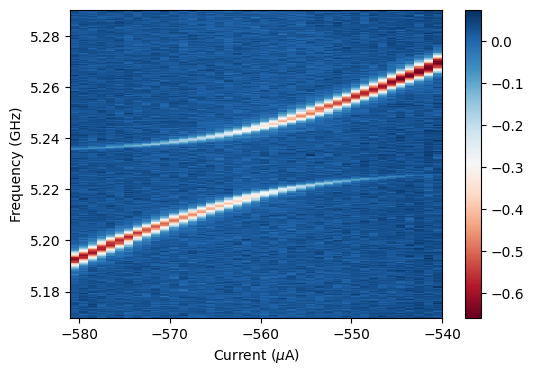

In [9]:
df = pd.read_csv(dpath + f'Q6-tuning-curve.csv')

freqs = np.unique(df['frequency'])
currs = np.unique(df['current'])
phase = np.array(df['phase']).reshape([len(currs), len(freqs)])

plt.figure(figsize=(6,4))
phase = phase.transpose() - np.mean(phase, axis=1)
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [10]:
fs = []
for i in range(len(currs)):
    if True:
        y = np.unwrap(phase[:,i])
        y = scipy.signal.savgol_filter(y, 13, 3)
        peaks = scipy.signal.find_peaks(-y, height=-0.006, distance=50, prominence=-0.1, width=1)
        temp = []
        for j in range(len(peaks[0])):
            if freqs[peaks[0][j]] > 5.185e9:
                temp.append(freqs[peaks[0][j]])
        fs.append(temp)

In [11]:
cL = []
fsL = []
cH = []
fsH = []
cD = []
fsD = []
HIGH = False
LOW = True
BOTH = False
for i in range(len(fs)):
    if len(fs[i]) > 1:
        HIGH = False
        LOW = False
        BOTH = True
    if len(fs[i]) == 1 & BOTH:
        HIGH = True
        BOTH = False
        LOW = False
    if HIGH:
        cH.append(currs[i])
        fsH.append(fs[i][0])
    if LOW:
        cL.append(currs[i])
        fsL.append(fs[i][0])
    if BOTH:
        cL.append(currs[i])
        fsL.append(fs[i][0])
        cH.append(currs[i])
        fsH.append(fs[i][1])
        cD.append(currs[i])
        fsD.append(fsH[-1] - fsL[-1])
cL = np.array(cL)
fsL = np.array(fsL)
cH = np.array(cH)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

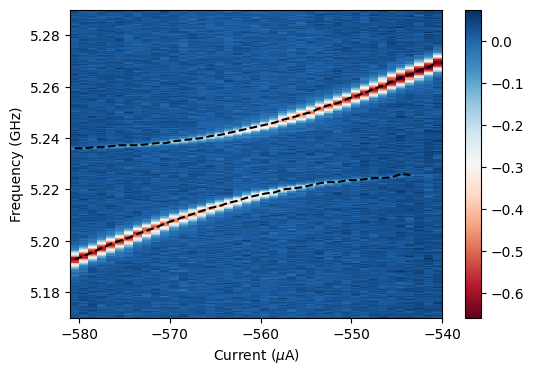

In [12]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.plot(cL*1e6, fsL/1e9, color='k', linestyle='dashed')
plt.plot(cH*1e6, fsH/1e9, color='k', linestyle='dashed')
plt.ylim([np.min(freqs/1e9), np.max(freqs/1e9)])
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [19]:
result = scipy.optimize.curve_fit(fit_hyperbola, cD, fsD, np.array([np.mean(cD), 1.7e12, 1.5e-5]))

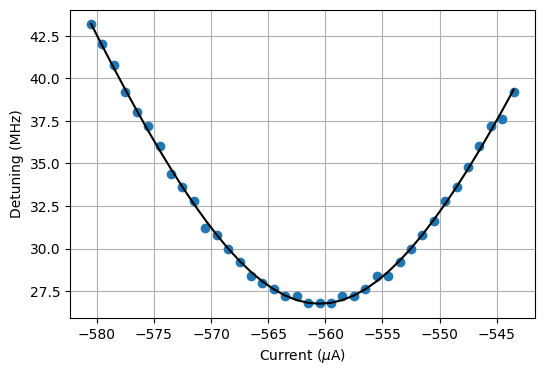

In [23]:
plt.figure(figsize=(6,4))
plt.plot(cD*1e6, fsD/1e6, 'o')
plt.plot(cD*1e6, fit_hyperbola(cD, *result[0])/1e6, '-', color='k')
plt.grid()
plt.ylabel('Detuning (MHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [21]:
result[0]

array([-5.60504604e-04,  1.69644592e+12,  1.57733227e-05])

## Q5

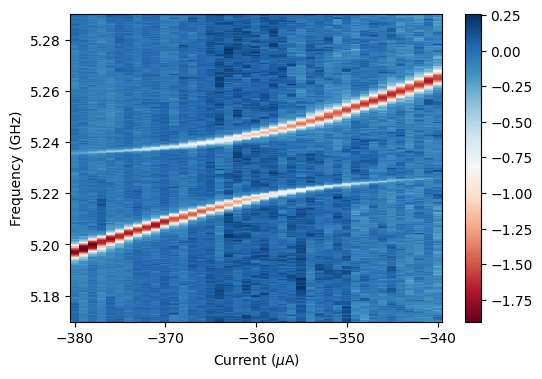

In [63]:
df = pd.read_csv(dpath + f'Q5-tuning-curve.csv')

freqs = np.unique(df['frequency'])
currs = np.unique(df['current'])
phase = np.array(df['phase']).reshape([len(currs), len(freqs)])

plt.figure(figsize=(6,4))
phase = phase.transpose() - np.mean(phase, axis=1)
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [181]:
fs = []
for i in range(len(currs)):
    if True:
        y = np.unwrap(phase[:,i])
        y = scipy.signal.savgol_filter(y, 13, 3)
        peaks = scipy.signal.find_peaks(-y, height=0.152, distance=40, prominence=0.14, width=7)
        temp = []
        for j in range(len(peaks[0])):
            if freqs[peaks[0][j]] > 5.186e9 and freqs[peaks[0][j]] < 5.270e9:
                if currs[i] < -350e-6:
                    temp.append(freqs[peaks[0][j]])
                elif freqs[peaks[0][j]] > 5.21e9:
                    temp.append(freqs[peaks[0][j]])
        fs.append(temp)

In [182]:
cL = []
fsL = []
cH = []
fsH = []
cD = []
fsD = []
HIGH = False
LOW = True
BOTH = False
for i in range(len(fs)):
    if len(fs[i]) > 1:
        HIGH = False
        LOW = False
        BOTH = True
    if len(fs[i]) == 1 & BOTH:
        HIGH = True
        BOTH = False
        LOW = False
    if HIGH:
        cH.append(currs[i])
        fsH.append(fs[i][0])
    if LOW:
        cL.append(currs[i])
        fsL.append(fs[i][0])
    if BOTH:
        cL.append(currs[i])
        fsL.append(fs[i][0])
        cH.append(currs[i])
        fsH.append(fs[i][1])
        cD.append(currs[i])
        fsD.append(fsH[-1] - fsL[-1])
cL = np.array(cL)
fsL = np.array(fsL)
cH = np.array(cH)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

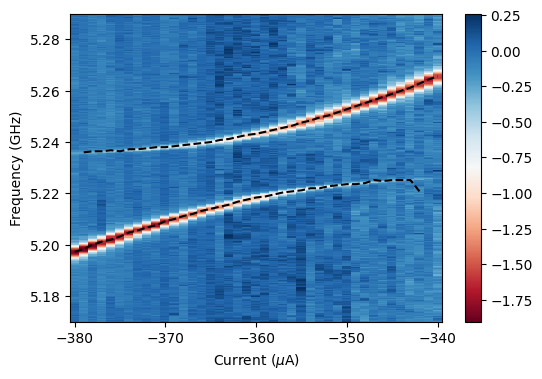

In [183]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.plot(cL*1e6, fsL/1e9, color='k', linestyle='dashed')
plt.plot(cH*1e6, fsH/1e9, color='k', linestyle='dashed')
plt.ylim([np.min(freqs/1e9), np.max(freqs/1e9)])
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [189]:
result = scipy.optimize.curve_fit(fit_hyperbola, cD[:-1], fsD[:-1], np.array([np.mean(cD), 1.7e12, 1.5e-5]))

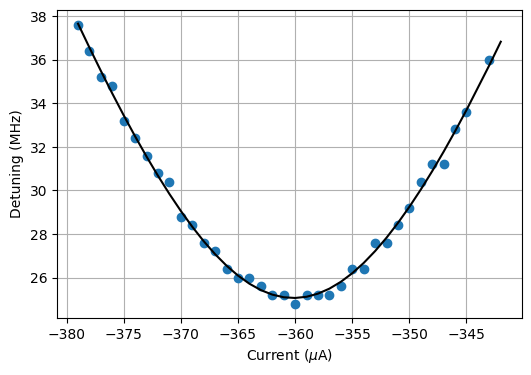

In [190]:
plt.figure(figsize=(6,4))
plt.plot(cD[:-1]*1e6, fsD[:-1]/1e6, 'o')
plt.plot(cD*1e6, fit_hyperbola(cD, *result[0])/1e6, '-', color='k')
plt.grid()
plt.ylabel('Detuning (MHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [191]:
result[0]

array([-3.60124860e-04,  1.48848078e+12,  1.68381826e-05])

## Q7

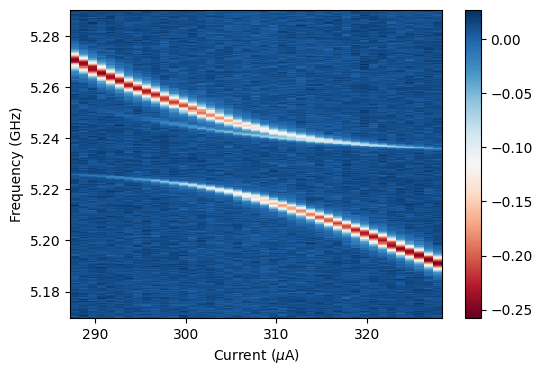

In [24]:
df = pd.read_csv(dpath + f'Q7-tuning-curve.csv')

freqs = np.unique(df['frequency'])
currs = np.unique(df['current'])
phase = np.array(df['phase']).reshape([len(currs), len(freqs)])

plt.figure(figsize=(6,4))
phase = phase.transpose() - np.mean(phase, axis=1)
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [57]:
fs = []
for i in range(len(currs)):
    if True:
        y = np.unwrap(phase[:,i])
        y = scipy.signal.savgol_filter(y, 13, 3)
        peaks = scipy.signal.find_peaks(-y, height=-0.003, distance=50, prominence=-0.003, width=1)
        temp = []
        for j in range(len(peaks[0])):
            if freqs[peaks[0][j]] > 5.185e9:
                temp.append(freqs[peaks[0][j]])
        fs.append(temp)

In [58]:
cL = []
fsL = []
cH = []
fsH = []
cD = []
fsD = []
HIGH = True
LOW = False
BOTH = False
for i in range(len(fs)):
    if len(fs[i]) > 1:
        HIGH = False
        LOW = False
        BOTH = True
    if len(fs[i]) == 1 & BOTH:
        HIGH = False
        BOTH = False
        LOW = True
    if HIGH:
        cH.append(currs[i])
        fsH.append(fs[i][0])
    if LOW:
        cL.append(currs[i])
        fsL.append(fs[i][0])
    if BOTH:
        cL.append(currs[i])
        fsL.append(fs[i][0])
        cH.append(currs[i])
        fsH.append(fs[i][1])
        cD.append(currs[i])
        fsD.append(fsH[-1] - fsL[-1])
cL = np.array(cL)
fsL = np.array(fsL)
cH = np.array(cH)
fsH = np.array(fsH)
cD = np.array(cD)
fsD = np.array(fsD)

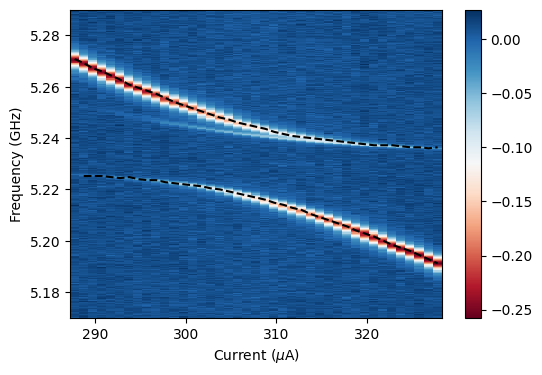

In [59]:
plt.figure(figsize=(6,4))
plt.pcolor(currs*1e6, freqs/1e9, np.unwrap(phase, axis=0), cmap='RdBu')
plt.plot(cL*1e6, fsL/1e9, color='k', linestyle='dashed')
plt.plot(cH*1e6, fsH/1e9, color='k', linestyle='dashed')
plt.ylim([np.min(freqs/1e9), np.max(freqs/1e9)])
plt.colorbar()
plt.ylabel('Frequency (GHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [60]:
result = scipy.optimize.curve_fit(fit_hyperbola, cD, fsD, np.array([np.mean(cD), 1.7e12, 1.5e-5]))

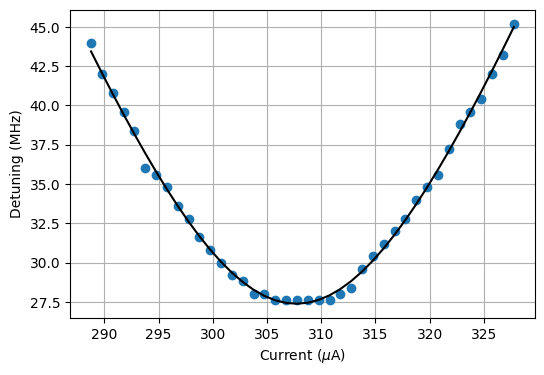

In [61]:
plt.figure(figsize=(6,4))
plt.plot(cD*1e6, fsD/1e6, 'o')
plt.plot(cD*1e6, fit_hyperbola(cD, *result[0])/1e6, '-', color='k')
plt.grid()
plt.ylabel('Detuning (MHz)')
plt.xlabel('Current ($\mu$A)')
plt.show()

In [62]:
result[0]

array([3.07706454e-04, 1.77980503e+12, 1.53845806e-05])

In [192]:
qpars = {
    5: {
        'a': 1489182746084.2454,
        'x0': -0.0003601224221728209,
        'b': 1.682865662915202e-05},
    7: {
        'a': 1779805029745.7712,
        'x0': 0.00030770645420760424,
        'b': 1.5384580628151482e-05},
    6: {
        'a': 1696445922365.959,
        'x0': -0.000560504604304109,
        'b': 1.577332269609055e-05}
}

In [199]:
detunes = np.linspace(30e6, 0, 21)
cs5 = qpars[5]['x0'] + detunes/qpars[5]['a']
cs6 = qpars[6]['x0'] + detunes/qpars[6]['a']
cs7 = qpars[7]['x0'] - detunes/qpars[7]['a']

In [200]:
cs5

array([-0.00033998, -0.00034098, -0.00034199, -0.000343  , -0.00034401,
       -0.00034501, -0.00034602, -0.00034703, -0.00034804, -0.00034904,
       -0.00035005, -0.00035106, -0.00035206, -0.00035307, -0.00035408,
       -0.00035509, -0.00035609, -0.0003571 , -0.00035811, -0.00035912,
       -0.00036012])

In [202]:
for c in cs6:
    print(c*1e6)

-542.8205746486512
-543.7047761314241
-544.588977614197
-545.4731790969698
-546.3573805797428
-547.2415820625157
-548.1257835452885
-549.0099850280615
-549.8941865108343
-550.7783879936072
-551.6625894763802
-552.546790959153
-553.4309924419259
-554.3151939246987
-555.1993954074717
-556.0835968902445
-556.9677983730174
-557.8519998557904
-558.7362013385632
-559.6204028213361
-560.504604304109
